In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score


movies_data=pd.read_csv('movies.dat', sep = '::', engine='python', encoding='utf-8')
movies_data.head()
movies_data.columns =['MovieIDs','MovieName','Category']
movies_data.dropna(inplace=True)
movies_data


,MovieIDs,MovieName,Category
0,2,Jumanji (1995),Adventure|Children's|Fantasy
1,3,Grumpier Old Men (1995),Comedy|Romance
2,4,Waiting to Exhale (1995),Comedy|Drama
3,5,Father of the Bride Part II (1995),Comedy
4,6,Heat (1995),Action|Crime|Thriller
...,...,...,...
3876,3948,Meet the Parents (2000),Comedy
3877,3949,Requiem for a Dream (2000),Drama
3878,3950,Tigerland (2000),Drama
3879,3951,Two Family House (2000),Drama


In [65]:
pip install seaborn

     -------------------------------------- 292.8/292.8 KB 1.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\barge_ellile0xda\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [2]:


movies_data.dropna(inplace=True)
movies_data
all_categories={}
for i , row in movies_data.iterrows(): 
    ara= row['Category'].split("|")
    for j in ara : 
        if not j in all_categories.keys(): 
            all_categories[j]=[]
        
print(len(all_categories.keys()))

18


In [3]:
for i , row in movies_data.iterrows(): 
    ara= row['Category'].split("|")
    for j in all_categories.keys():
        if j in ara :
            all_categories[j].append(1)
        else :
            all_categories[j].append(0)
for k in all_categories.keys(): 
    print(len(all_categories[k]))
print(all_categories.keys())

3881
3881
3881
3881
3881
3881
3881
3881
3881
3881
3881
3881
3881
3881
3881
3881
3881
3881
dict_keys(['Adventure', "Children's", 'Fantasy', 'Comedy', 'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror', 'Animation', 'Sci-Fi', 'Documentary', 'War', 'Musical', 'Mystery', 'Film-Noir', 'Western'])


In [4]:
for k in all_categories.keys(): 
    movies_data[k]=all_categories[k]

In [5]:
# Remove column name 'A'
movies_data.drop(['Category'], axis = 1)

,MovieIDs,MovieName,Adventure,Children's,Fantasy,Comedy,Romance,Drama,Action,Crime,Thriller,Horror,Animation,Sci-Fi,Documentary,War,Musical,Mystery,Film-Noir,Western
0,2,Jumanji (1995),1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3,Grumpier Old Men (1995),0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4,Waiting to Exhale (1995),0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,5,Father of the Bride Part II (1995),0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,6,Heat (1995),0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3876,3948,Meet the Parents (2000),0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3877,3949,Requiem for a Dream (2000),0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3878,3950,Tigerland (2000),0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3879,3951,Two Family House (2000),0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
rating_data = pd.read_csv("ratings.dat",sep='::', engine='python')
rating_data.columns =['ID','MovieID','Ratings','TimeStamp']
rating_data.dropna(inplace=True)


In [10]:
df = pd.concat([movies_data, rating_data,user_data], axis=1)

In [11]:
df.dropna(inplace=True)
gender=[]
#1 for male 0 for female
for j,row in df.iterrows(): 
    if row['Gender']=='M':
        gender.append(1)
    else :
        gender.append(0)
df.drop(['Gender'], axis = 1)
df['Gender']=gender

In [12]:
user_data = pd.read_csv("users.dat",sep='::',engine='python')
user_data.columns =['UserID','Gender','Age','Occupation','Zip-code']
user_data.dropna(inplace=True)
user_data.drop(['Zip-code'], axis = 1)


,UserID,Gender,Age,Occupation
0,2,M,56,16
1,3,M,25,15
2,4,M,45,7
3,5,M,25,20
4,6,F,50,9
...,...,...,...,...
6034,6036,F,25,15
6035,6037,F,45,1
6036,6038,F,56,1
6037,6039,F,45,0


<AxesSubplot:>

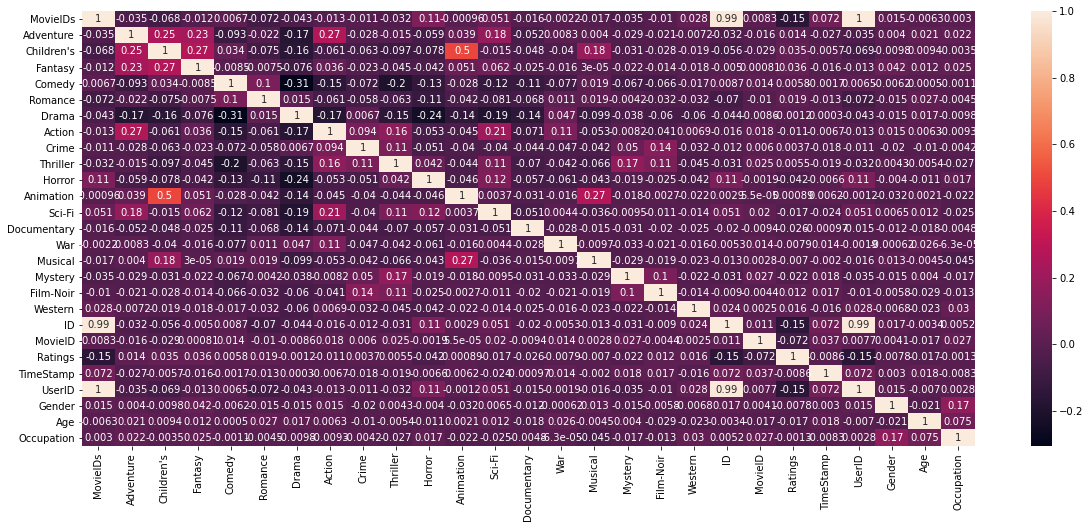

In [13]:

import seaborn as sns # For creating plots
c=df.corr()
plt.figure(figsize=(20,8))
sns.heatmap(c,annot=True)



<AxesSubplot:>

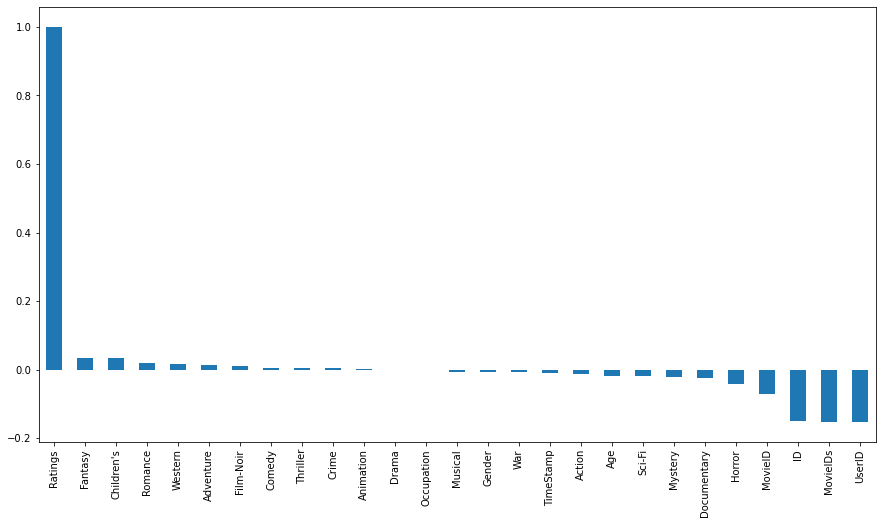

In [15]:
plt.figure(figsize=(15,8))
df.corr()['Ratings'].sort_values(ascending = False).plot(kind='bar')

In [16]:
df.isnull().sum()



MovieIDs       0
MovieName      0
Category       0
Adventure      0
Children's     0
Fantasy        0
Comedy         0
Romance        0
Drama          0
Action         0
Crime          0
Thriller       0
Horror         0
Animation      0
Sci-Fi         0
Documentary    0
War            0
Musical        0
Mystery        0
Film-Noir      0
Western        0
ID             0
MovieID        0
Ratings        0
TimeStamp      0
UserID         0
Gender         0
Age            0
Occupation     0
Zip-code       0
dtype: int64

In [26]:
training_data, testing_data = train_test_split(df, test_size=0.2)
y_train=training_data['Ratings']

X_train=training_data[['MovieID','Age','Occupation','Adventure', "Children's", 'Fantasy', 'Comedy', 'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror', 'Animation', 'Sci-Fi', 'Documentary', 'War', 'Musical', 'Mystery', 'Film-Noir', 'Western']].values
regr = linear_model.LinearRegression()
X_test=testing_data[['MovieID','Age','Occupation','Adventure', "Children's", 'Fantasy', 'Comedy', 'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror', 'Animation', 'Sci-Fi', 'Documentary', 'War', 'Musical', 'Mystery', 'Film-Noir', 'Western']].values
#X_test=testing_data.drop(['TimeStamp','Zip-code','MovieName','Category'], axis = 1)
y_test=testing_data['Ratings']
# Train the model using the training sets
regr.fit(X_train,y_train)
y_pred=regr.predict(X_test)

# Make predictions using the testing set
y_pred

array([3.52716009, 3.48949651, 3.7077638 , 3.56958445, 3.53016176,
       3.45021433, 3.63406084, 3.31409684, 3.5661027 , 3.49404077,
       3.40949529, 3.55232319, 3.49468938, 3.65705227, 3.83692026,
       3.65545878, 3.8013953 , 3.48645243, 3.50412124, 3.58154161,
       3.68884319, 3.67170208, 3.35052997, 3.57376578, 3.4280728 ,
       3.54736624, 3.59689554, 3.50501496, 3.64064   , 3.55304196,
       3.53353744, 3.78332384, 3.75840138, 3.61931538, 3.6095914 ,
       3.69751125, 3.41796054, 3.61505716, 3.54532013, 3.29606717,
       3.59949499, 3.69487448, 3.43242369, 3.59899434, 3.4786865 ,
       3.4926418 , 3.65454995, 3.58727928, 3.36564963, 3.5668886 ,
       3.37316197, 3.50613396, 3.58502587, 3.48158152, 3.65427548,
       3.70102968, 3.68536479, 3.41388913, 3.47141572, 3.55382437,
       3.49227619, 3.51173653, 3.45467624, 3.50564767, 3.78499602,
       3.64647621, 3.6291354 , 3.56286063, 3.66598987, 3.5060984 ,
       3.47509754, 3.42987432, 3.50849491, 3.62699572, 3.67558

In [24]:
y_pred


LinearRegression()

In [28]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

#on obtient un coefficient R2 trés faible, le modèle de régression linéaire n'est pas adapté
#on va tester un autre modèle

0.011091733474041243

In [32]:
from sklearn.tree import DecisionTreeClassifier
training_data, testing_data = train_test_split(df, test_size=0.2)
y_train=training_data['Ratings']

X_train=training_data[['MovieID','Age','Occupation','Adventure', "Children's", 'Fantasy', 'Comedy', 'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror', 'Animation', 'Sci-Fi', 'Documentary', 'War', 'Musical', 'Mystery', 'Film-Noir', 'Western']].values
regr = linear_model.LinearRegression()
X_test=testing_data[['MovieID','Age','Occupation','Adventure', "Children's", 'Fantasy', 'Comedy', 'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror', 'Animation', 'Sci-Fi', 'Documentary', 'War', 'Musical', 'Mystery', 'Film-Noir', 'Western']].values
#X_test=testing_data.drop(['TimeStamp','Zip-code','MovieName','Category'], axis = 1)
y_test=testing_data['Ratings']
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)

print("la précision du modèle est de")
acc_decision_tree

la précision du modèle est de


99.94